In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # imblearn library can be installed using pip install imblearn
from imblearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
dataset0 = pd.read_csv('/content/adult.csv')

#Data exploration

In [ ]:
dataset0.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
dataset0.replace("?", np.nan, inplace = True)
dataset0.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

VARIABLES ANALYSIS AND FEATURE SELECTION

*   **income binomial - ordinal - variable of interest**
*   sex binomial - nominal
*   race - nominal
*   relationship - nominal
*   occupation - nominal
*   marital.status - nominal
*   education and education.num have the same data - ordinal
*   workclass - nominal
*   native.country - nominal
*   age - discrete (age is continuous but here is taken as discrete)
*   fnlwgt - discrete
*   capital-gain - continuous
*   capital-loss - continuous
*   education.num - ordinal
*   hours-per-week - discrete (is continuous but taken as discrete)

**Note**
In this analysis, income is considered as an **'Independent Variable'** while the rest of them as **'Dependent Variables'**.

#Data preparation

**Data cleaning**

In [ ]:
dataset = dataset0.fillna(dataset0.mode().iloc[0])
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**Data transformation**

In [ ]:
# function to fill up the replace function.
def fillUp(data):
  l = {}
  n = 1
  for i in data:
    l[i] = n
    n = n+1
  return l

In [ ]:
u = pd.DataFrame(dataset['workclass'].value_counts()).index
u

Index(['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc',
       'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype='object')

In [ ]:
workclassValues = fillUp(pd.DataFrame(dataset['workclass'].value_counts()).index)
sexValues = fillUp(pd.DataFrame(dataset['sex'].value_counts()).index)
raceValues = fillUp(pd.DataFrame(dataset['race'].value_counts()).index)
relationshipValues = fillUp(pd.DataFrame(dataset['relationship'].value_counts()).index)
occupationValues = fillUp(pd.DataFrame(dataset['occupation'].value_counts()).index)
maritalstatusValues = fillUp(pd.DataFrame(dataset['marital.status'].value_counts()).index)
nativecountryValues = fillUp(pd.DataFrame(dataset['native.country'].value_counts()).index)
incomeValues = fillUp(pd.DataFrame(dataset['income'].value_counts()).index)

In [ ]:
workclassValues

{'Private': 1,
 'Self-emp-not-inc': 2,
 'Local-gov': 3,
 'State-gov': 4,
 'Self-emp-inc': 5,
 'Federal-gov': 6,
 'Without-pay': 7,
 'Never-worked': 8}

In [ ]:
df1 = dataset.replace({'workclass':workclassValues})
df2 = df1.replace({'sex':sexValues})
df3 = df2.replace({'race':raceValues})
df4 = df3.replace({'relationship':relationshipValues})
df5 = df4.replace({'occupation':occupationValues})
df6 = df5.replace({'native.country':nativecountryValues})
df7 = df6.replace({'income':incomeValues})
df = df7.replace({'marital.status':maritalstatusValues})

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,1,77053,HS-grad,9,5,1,2,1,2,0,4356,40,1,1
1,82,1,132870,HS-grad,9,5,3,2,1,2,0,4356,18,1,1
2,66,1,186061,Some-college,10,5,1,4,2,2,0,4356,40,1,1
3,54,1,140359,7th-8th,4,3,7,4,1,2,0,3900,40,1,1
4,41,1,264663,Some-college,10,4,1,3,1,2,0,3900,40,1,1


#Applying logistic regression

In [ ]:
X = df.drop(columns=['income', 'education'])
Y = df['income']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 101)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.797322196290382

In [ ]:
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[5979  185]
 [1465  512]]
              precision    recall  f1-score   support

           1       0.80      0.97      0.88      6164
           2       0.73      0.26      0.38      1977

    accuracy                           0.80      8141
   macro avg       0.77      0.61      0.63      8141
weighted avg       0.79      0.80      0.76      8141



*   Low recall in >50K class

#Checking correlation

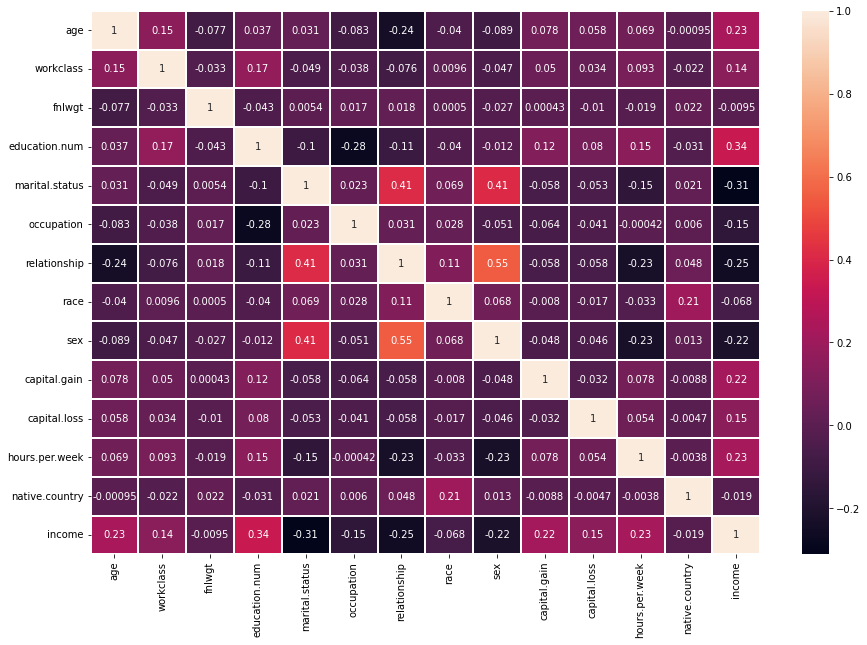

In [ ]:
plt.subplots(figsize=(15,10))
corrs = df.corr()
map1 = sns.heatmap(corrs, annot=True, linewidth=1)#, cmap='coolwarm')
map1

**Drop the following variables:**
*   native.country
*   fnlwgt
*   race

In [ ]:
X = df.drop(columns=['income', 'education', 'fnlwgt', 'native.country','race'])
Y = df['income']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 101)

model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8340498710232158

In [ ]:
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[5797  367]
 [ 984  993]]
              precision    recall  f1-score   support

           1       0.85      0.94      0.90      6164
           2       0.73      0.50      0.60      1977

    accuracy                           0.83      8141
   macro avg       0.79      0.72      0.75      8141
weighted avg       0.82      0.83      0.82      8141



#Aplying stochastic gradient descent

In [ ]:
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

**Note:**
The parameters obtained after running the algorithm once were set up into the model to run it multiple times at a faster speed.

**F1 as scoring parameter**

In [ ]:
model = Pipeline([
        ('balancing', SMOTE(random_state = 101)),
        ('classification', SGDClassifier(loss = 'log', penalty = 'elasticnet', random_state = 1))
    ])
#grid_param = {'classification__eta0': [.001,.01,.1,1,10,100], 'classification__max_iter' : [100,500,1000], 'classification__alpha': [.001,0.01,.1,1,10,100], 'classification__l1_ratio': [0,0.3,0.5,0.7,1]}
grid_param = {'classification__eta0': [.001], 'classification__max_iter' : [100], 'classification__alpha': [.001], 'classification__l1_ratio': [0]}

gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='f1', cv=5)

In [ ]:
"""
In the above GridSearchCV(), scoring parameter should be set as follows:
scoring = 'accuracy' when you want to maximize prediction accuracy
scoring = 'recall' when you want to minimize false negatives
scoring = 'precision' when you want to minimize false positives
scoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)
"""

gd_sr.fit(X_scaled, Y)

best_parameters = gd_sr.best_params_
print("Best parameters: ", best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("Best result: ", best_result)

Best parameters:  {'classification__alpha': 0.001, 'classification__eta0': 0.001, 'classification__l1_ratio': 0, 'classification__max_iter': 100}
Best result:  0.8537309666384031


In [ ]:
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('balancing', SMOTE(random_state=101)),
                                       ('classification',
                                        SGDClassifier(loss='log',
                                                      penalty='elasticnet',
                                                      random_state=1))]),
             param_grid={'classification__alpha': [0.001],
                         'classification__eta0': [0.001],
                         'classification__l1_ratio': [0],
                         'classification__max_iter': [100]},
             scoring='f1')

In [ ]:
y_pred = gd_sr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[4825 1339]
 [ 445 1532]]
              precision    recall  f1-score   support

           1       0.92      0.78      0.84      6164
           2       0.53      0.77      0.63      1977

    accuracy                           0.78      8141
   macro avg       0.72      0.78      0.74      8141
weighted avg       0.82      0.78      0.79      8141



**Accuracy as scoring parameter**

In [ ]:
model = Pipeline([
        ('balancing', SMOTE(random_state = 101)),
        ('classification', SGDClassifier(loss = 'log', penalty = 'elasticnet', random_state = 1))
    ])
#grid_param = {'classification__eta0': [.001,.01,.1,1,10,100], 'classification__max_iter' : [100,500,1000], 'classification__alpha': [.001,0.01,.1,1,10,100], 'classification__l1_ratio': [0,0.3,0.5,0.7,1]}
grid_param = {'classification__eta0': [.001], 'classification__max_iter' : [100], 'classification__alpha': [.01], 'classification__l1_ratio': [1]}

gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='accuracy', cv=5)

In [ ]:
"""
In the above GridSearchCV(), scoring parameter should be set as follows:
scoring = 'accuracy' when you want to maximize prediction accuracy
scoring = 'recall' when you want to minimize false negatives
scoring = 'precision' when you want to minimize false positives
scoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)
"""

gd_sr.fit(X_scaled, Y)

best_parameters = gd_sr.best_params_
print("Best parameters: ", best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("Best result: ", best_result)

Best parameters:  {'classification__alpha': 0.01, 'classification__eta0': 0.001, 'classification__l1_ratio': 1, 'classification__max_iter': 100}
Best result:  0.7978268373477955


In [ ]:
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('balancing', SMOTE(random_state=101)),
                                       ('classification',
                                        SGDClassifier(loss='log',
                                                      penalty='elasticnet',
                                                      random_state=1))]),
             param_grid={'classification__alpha': [0.01],
                         'classification__eta0': [0.001],
                         'classification__l1_ratio': [1],
                         'classification__max_iter': [100]},
             scoring='accuracy')

In [ ]:
y_pred = gd_sr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[5266  898]
 [ 633 1344]]
              precision    recall  f1-score   support

           1       0.89      0.85      0.87      6164
           2       0.60      0.68      0.64      1977

    accuracy                           0.81      8141
   macro avg       0.75      0.77      0.76      8141
weighted avg       0.82      0.81      0.82      8141

